<h2 id="tocheading">Table of Contents</h2>
<div id="toc"></div>

In [126]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

### WRANGLE AND ANALYZE DATA PROJECT

#### Introduction

The aim of this project is to wrangle WeRateDogs Twitter data in order to create interesting and trustworthy analyses and visualisations.  
The data wrangling process consist of three phases 

    - Gathering data
    - Assessing data
    - Cleaning data
    
- The cleaned data will be analysed and used to create visuals to give possible interpretation for the data. A report for both processes will also be submitted at the end. 

#### Gathering Data
Three pieces of data is required for this project:

1. The WeRateDogs Twitter archive data, provided by Udacity and downloaded manually from Udacity resource center
2. The tweet image predictions, hosted on Udacity's server and downloaded programmatically using `Get Requests` 
3. Retweet and favorite counts for the tweet_id's in the archived data from `1` above. This data is accessed by qerying the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.

#### Assessing Data 
- After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues.
- Target is to  detect and document at least eight (8) quality issues and two (2) tidiness issues.

#### Cleaning Data
- Issues documented while assessing wil be cleaned to give an output of high quality and tidy master pandas DataFrame.

#### Storing, Analyzing, and Visualizing Data 
- Store the clean DataFrame(s) in a CSV file with the main one named `twitter_archive_master.csv`. Wrangled data will be analysed and visualised using Jupyter notebook. This should include at least three (3) insights and one (1) visualisation. 
- A written report will prepared to describe the wrangling efforts and second report to communicate the insights and displays will also be prepared. 

In [1]:
#Import Necessary modules
import pandas as pd
import numpy as np
import os

#to make requests
import requests

#to display tables
from IPython.display import display

#to access twitter APi
import tweepy as tw

#to write json to pandas dataframe
from pandas import DataFrame

#for json file
import json

#import necessary modules for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style> 

### DATA GATHERING

Three pieces of data will be gathered for this project.

**Data One** 

The WeRateDogs Twitter archive. Provided and made available by Udacity. Downloaded from the resource centre and loaded into notebook as **.csv**

In [3]:
#import data to have an overview
df1 = pd.read_csv('twitter_archive_enhanced.csv')

In [4]:
df1.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [5]:
df1.shape

(2356, 17)

**Data Two**

The tweet image predictions, this information tells what breed of dog (or other object, animal, etc.) is present in each tweet. This was already provided by Udacity according to a neural network that can classify breeds of dogs. 

- This file (image_predictions.tsv) is hosted on Udacity's servers and downloaded using **Requests** library

In [6]:
#Getting the url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [7]:
#to view raw data
#response.content

In [53]:
#savingg file to computer
with open('C:/Users/Frances-Anthony/Documents/Udacity/data_wrangle_analyze_project/image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [7]:
#Load image data
df2 = pd.read_csv('image_predictions.tsv', delimiter="\t")
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Data three** 

Extract each tweet's retweet count and favorite ("like") count for the `tweet_id` in the archived data downloaded. 

**HOW:** 
1. using the tweet IDs in the `WeRateDogs` Twitter archive, 
2. query the Twitter API for each tweet's JSON data using Python's `Tweepy library` and 
3. store each tweet's entire set of JSON data in a file called `tweet_json.txt file.`
4. Read the `.txt` file line by line into a pandas frame with these columns `(tweet_id, retweet_count, favorite_count).`

In [ ]:
#import necessary modules in this insatnce Tweepy has already been imported above
#from the twitter archved data provided by Udacity call tweet_id to query twitter API for retweets and "likes" counts
#to access twitter API, input consumer and secret key gotten from twitter
#for privacy, i will leave them blank

#define keys
consumer_key= '.......'
consumer_secret = '..........'
access_token = '..........'
access_token_secret = '........'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

#get tweets from twitter API 
retweet_favorite_count = []

#save missing tweets in this list
not_found = []

with open('tweet_json.txt', mode = "w") as file:
    for i in list(df1.tweet_id):
        try:
            tweet = api.get_status(str(i))
            file.write(json.dumps(tweet._json))
            retweet_favorite_count.append({"tweet_id":str(i),
                                          "retweet_count": tweet._json['retweet_count'],
                                          "favourite_count": tweet._json['favorite_count']})
        except:
                not_found.append(i)

In [90]:
#Read the .txt file line by line into a pandas frame with these columns 
#(tweet_id, retweet_count, favorite count).
#df3 = pd.DataFrame(retweet_favorite_count, columns=['tweet_id', 'retweet_count', 'favourite_count'])

In [66]:
#write to a csv file
#df3.to_csv('retweet_and_favorites_counts.csv')

In [8]:
#read retweet_favorite_counts as csv and assign to dataframe
df3 = pd.read_csv('retweet_and_favorite_counts.csv')
df3.head()

,Unnamed: 0,tweet_id,retweet_count,favourite_count
0,0,892420643555336193,7340,34978
1,1,892177421306343426,5475,30279
2,2,891815181378084864,3621,22784
3,3,891689557279858688,7529,38245
4,4,891327558926688256,8108,36522


In [9]:
df3.shape

(2331, 4)

## ASSESSING


The next phase of the project is assessing the gathered data. I will be assessing the data for quality and tidiness both manually and programmatically using pandas methods.


#### 1. ASSESSING TWITTER ARCHIVE DATA

In [12]:
#renamed the df 
archived_data = df1
archived_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### COLUMN DESCRIPTION
- tweet_id: 
- n_reply_to_status_id	
- in_reply_to_user_id	
- timestamp	
- source	
- text	
- retweeted_status_id	
- retweeted_status_user_id	
- retweeted_status_timestamp	
- expanded_urls	
- rating_numerator	
- rating_denominator	
- name	
- doggo	
- floofer
- pupper
- puppo

### QUALITY ISSUES
- missing data: in_reply_to_status_id and in_reply_to_user_id has only 78 rows available out of the 2356.
- not original tweet, columns retweeted_status_timestamp, retweeted status_id and user_id means that rows are retweet and not original tweet. (drop rows)	
- dog name is none for 745 rows - check if the same rows with retweet
- dog names recorded as `a` or `an` should be `None`
- rows with `a` also have dog style
- does not contain retweet and favorite counts 
- inconsistent rating_denominator -value should be 10, values    greater than 10 should be removed
- very high rating_numerator as much 1776, not an issue but keep in mind
- time stamp has object data type, change to datetime
- some rows have several identical values in the expanded_url column concatenated by a comma.

### TIDINESS ISSUES
- create one column for dog stage, collapse multiple colunmns and rows. convert the rows (name, doggo, floofer,pupper,puppo into two columns, one with dog name and one with dog level specifying either from the list)
- expanded url has multiple url on one row
- the three datasets can be one,all have tweet_id

In [13]:
archived_data.shape

(2356, 17)

In [14]:
archived_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
archived_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [137]:
archived_data.puppo.unique()

array(['None', 'puppo'], dtype=object)

In [138]:
archived_data.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [139]:
archived_data.retweeted_status_id.nunique() 

181

In [140]:
#archived_data.rating_denominator.isnull()
archived_data.rating_numerator.isnull().sum().any()

False

In [141]:
archived_data.name.nunique(),archived_data.name.value_counts();

In [142]:
#check for duplicates
archived_data.tweet_id.duplicated().sum()

0

In [143]:
archived_data.tweet_id.nunique() #no duplicates

2356

In [144]:
#archived_data.name.isnull().any()
archived_data.query('name == "None"');

In [145]:
#dog names recorded as a or an
#archived_data.query('name == "an"')
archived_data.query('name == "a"');

In [146]:
archived_data.retweeted_status_id.notnull().sum()

181

In [147]:
archived_data.rating_denominator.nunique(),archived_data.rating_denominator.duplicated().sum()

(18, 2338)

In [148]:
#archived_data.rating_denominator.value_counts()
archived_data.rating_denominator.isnull().sum().any()

False

In [149]:
archived_data.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [150]:
archived_data.rating_denominator.value_counts();

In [151]:
#archived_data.rating_numerator.notnull().sum()
archived_data.rating_numerator.isnull().sum()

0

In [152]:
archived_data.rating_numerator.unique();

In [153]:
archived_data.rating_numerator.value_counts();

In [154]:
archived_data.query('rating_numerator == 1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [155]:
archived_data.rating_numerator.isnull().sum()

0

In [156]:
archived_data.expanded_urls.isnull();

#### 2. ASSESSING IMAGE PREDICTIONS DATA

In [16]:
#Reassign dataframe
image_pred = df2
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
image_pred.shape

(2075, 12)

#### Column Description

- `tweet_id` is the last part of the tweet URL after "status/" 
- `p1` is the algorithm's #1 prediction for the image in the tweet
- `p1_conf` is how confident the algorithm is in its #1 prediction in `%`
- `p1_dog` is whether or not the #1 prediction is a breed of dog
- `p2` is the algorithm's second most likely prediction
- `p2_conf` is how confident the algorithm is in its #2 prediction 
- `p2_dog` is whether or not the #2 prediction is a breed of dog
- `p3` is the algorithm's 3rd most likely prediction
- `p3_conf` is how confident the algorithm is in its #3 prediction 
- `p3_dog` is whether or not the #3 prediction is a breed of dog

In [18]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Quality issues
- inconsistent naming for dog breeds p1, remove underscore
- convert prediction number to type `int` and remove letter `p` 
- inconsistent labelling for dog breeds, convert all breed name to lower case
- some breed predictions are false
#### Tidiness issues
- Predictions are spread in three columns.
- Confidence intervals are spread in three columns.
- Dog tests are spread in three columns.
- Melt all three into two columns (breed and confidence)

In [19]:
sum(image_pred.tweet_id.duplicated())

0

In [20]:
image_pred.p1_dog.unique(), image_pred.p2_dog.unique(), image_pred.p3_dog.unique()

(array([ True, False]), array([ True, False]), array([ True, False]))

In [21]:
image_pred.query('p1 == "NaN"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [39]:
image_pred.p1.unique();

#### 3. ASSESSING RETWEET AND FAVORITE COUNT DATA

In [22]:
rtwt_fav_count = df3
rtwt_fav_count.head()

,Unnamed: 0,tweet_id,retweet_count,favourite_count
0,0,892420643555336193,7340,34978
1,1,892177421306343426,5475,30279
2,2,891815181378084864,3621,22784
3,3,891689557279858688,7529,38245
4,4,891327558926688256,8108,36522


#### Column Description
- `tweet_id` the tweet_id
- `retweet_count` number of retweet for each Id
- `favourite_count` number of `likes` for the Id

In [23]:
rtwt_fav_count.shape

(2331, 4)

In [24]:
rtwt_fav_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Unnamed: 0       2331 non-null   int64
 1   tweet_id         2331 non-null   int64
 2   retweet_count    2331 non-null   int64
 3   favourite_count  2331 non-null   int64
dtypes: int64(4)
memory usage: 73.0 KB


#### Quality issues
- first column(unamed 0) not needed - drop

#### Tidiness issues
- None

In [25]:
rtwt_fav_count.isnull().sum().any()

False

### CLEANING

**CLEANING FOR ARCHIVED DATA**

In [26]:
df1 = pd.read_csv('twitter_archive_enhanced.csv')

In [27]:
archived_data = df1

In [28]:
#Make copies of dataframe
archived_data_clean = archived_data
image_pred_clean = image_pred
rtwt_fav_count_clean = rtwt_fav_count

In [29]:
archived_data_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


<font color='red'> **TIDINESS ISSUE - 1** </font>

**Define**

- Name and dog stages row do not obey [Tidy Data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) rule.
- Use pandas method `assign`: To melt the dog stages columns that occured in multiple columns **doggo, floofer, pupper, puppo** to obey the tidy data rule. 

**CODE**

In [30]:
#create a copy for df
archived_data_clean_melt = archived_data_clean

In [31]:
#count for values in individual columns
archived_data_clean_melt['dog_stage'] = None
archived_data_clean_melt['dog_stage'] = archived_data_clean_melt.doggo + archived_data_clean_melt.floofer + archived_data_clean_melt.pupper + archived_data_clean_melt.puppo
archived_data_clean_melt['dog_stage'].value_counts()

NoneNoneNoneNone        1976
NoneNonepupperNone       245
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: dog_stage, dtype: int64

In [32]:
#use assign method to reassign the vlaues to the new column called dog_stage
archived_data_clean_melt = archived_data_clean_melt.assign(dog_stage = archived_data_clean_melt.doggo.astype(str) + archived_data_clean_melt.floofer.astype(str) + 
archived_data_clean_melt.pupper.astype(str) + archived_data_clean_melt.puppo.astype(str))                                             

In [33]:
archived_data_clean_melt.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NoneNoneNoneNone
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NoneNoneNoneNone
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NoneNoneNoneNone
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NoneNoneNoneNone
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NoneNoneNoneNone


In [34]:
#replace all None with empty
archived_data_clean_melt['dog_stage'] = archived_data_clean_melt['dog_stage'].map(lambda x: x.replace("None",""))

In [35]:
archived_data_clean.shape

(2356, 18)

In [36]:
archived_data_clean_melt.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
1237,712309440758808576,NaN,NaN,2016-03-22 16:06:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Reminder that we made our first set of sticker...,NaN,NaN,NaN,https://twitter.com/stickergrub/status/7099191...,12,10,None,None,None,pupper,None,pupper
2240,667924896115245057,NaN,NaN,2015-11-21 04:37:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jiminy. He has always wanted to be a c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667924896...,9,10,Jiminy,None,None,None,None,
2243,667902449697558528,NaN,NaN,2015-11-21 03:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cleopatricia. She is a northern Paperb...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667902449...,9,10,Cleopatricia,None,None,None,None,


In [37]:
#drop other stage columns
archived_data_clean_melt.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1, inplace=True)
archived_data_clean_melt.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,


In [38]:
#view unique values in column
archived_data_clean_melt.dog_stage.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [39]:
#delete rows with empty dog stage
#archived_data_clean_melt = archived_data_clean_melt[(archived_data_clean_melt.dog_stage != "")] 

In [40]:
archived_data_clean_melt.dog_stage.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [41]:
archived_data_clean_melt.shape

(2356, 14)

**Test**

In [42]:
archived_data_clean_melt['dog_stage'].value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [43]:
archived_data_clean_melt.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,


<font color='blue'> **QUALITY ISSUE - 1** </font>

**Define**

Some dog names recorded as `a` or `an` probably an error due to missign data. Rename as `None`

**Code**

In [65]:
archived_data_clean = archived_data_clean_melt

In [45]:
archived_data_clean.head();

In [46]:
archived_data_clean.query('name == "a"');

In [47]:
archived_data_clean.query('name == "an"');

In [48]:
#rename rows with name as 'a' and 'an' to None
archived_data_clean.loc[archived_data_clean['name'] == "a", 'name'] = 'None'
archived_data_clean.loc[archived_data_clean['name'] == "an", 'name'] = 'None'

**Test**

In [49]:
archived_data_clean.query('name == "an"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


In [50]:
archived_data_clean.query('name == "a"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


<font color='blue'> **QUALITY ISSUE - 2** </font>

**Define**

In-consistent `rating_denominator`. Denominator cannot be greater then **10**. Select rows and drop

**Code**

In [51]:
not_ten = list(archived_data_clean.query('rating_denominator !=10').index)
archived_data_clean.drop(index=not_ten, inplace = True)

In [52]:
archived_data_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,


In [53]:
archived_data_clean.rating_denominator.unique()

array([10], dtype=int64)

In [54]:
#archived_data_clean.drop(archived_data_clean.index[archived_data_clean['rating_denominator'] > 10])

**TEST**

In [55]:
archived_data_clean.rating_denominator.unique()

array([10], dtype=int64)

In [56]:
archived_data_clean.rating_denominator.value_counts()

10    2333
Name: rating_denominator, dtype: int64

<font color='blue'> **QUALITY ISSUE - 3** </font>

**DEFINE**

- Missing data for in_reply_to_status_id and in_reply_to_user_id has only 78 rows available out of the 2356. Drop these columns.

In [57]:
archived_data_clean.in_reply_to_user_id.count()

73

In [58]:
archived_data_clean.in_reply_to_user_id	.isnull().sum(), archived_data_clean.in_reply_to_status_id.isnull().sum()

(2260, 2260)

**CODE**

In [59]:
#drop columns
archived_data_clean = archived_data_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis=1)

**TEST**

In [60]:
archived_data_clean.head(2)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,


<font color='blue'> **QUALITY ISSUE - 4** </font>

**DEFINE**

- Not original tweet, columns retweeted_status_timestamp, retweeted status_id and user_id(drop columns). This shows rows are retweets and not original posts, retweets are not of interest in this data.

**CODE**

In [66]:
archived_data_clean.retweeted_status_id.isnull().sum(), archived_data_clean.retweeted_status_user_id.isnull().sum()

(2153, 2153)

In [67]:
#drop columns
archived_data_clean = archived_data_clean.drop(['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

**TEST**

In [68]:
archived_data_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,


<font color='blue'> **QUALITY ISSUE - 5** </font>

**DEFINE**
- Timestamp column is stored as object, convert to datetime

**CODE**

In [69]:
archived_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2333 non-null   int64  
 1   in_reply_to_status_id  73 non-null     float64
 2   in_reply_to_user_id    73 non-null     float64
 3   timestamp              2333 non-null   object 
 4   source                 2333 non-null   object 
 5   text                   2333 non-null   object 
 6   expanded_urls          2278 non-null   object 
 7   rating_numerator       2333 non-null   int64  
 8   rating_denominator     2333 non-null   int64  
 9   name                   2333 non-null   object 
 10  dog_stage              2333 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 218.7+ KB


In [70]:
archived_data_clean.timestamp = archived_data_clean.timestamp.astype('datetime64')

**TEST**

In [71]:
archived_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               2333 non-null   int64         
 1   in_reply_to_status_id  73 non-null     float64       
 2   in_reply_to_user_id    73 non-null     float64       
 3   timestamp              2333 non-null   datetime64[ns]
 4   source                 2333 non-null   object        
 5   text                   2333 non-null   object        
 6   expanded_urls          2278 non-null   object        
 7   rating_numerator       2333 non-null   int64         
 8   rating_denominator     2333 non-null   int64         
 9   name                   2333 non-null   object        
 10  dog_stage              2333 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 218.7+ KB


<font color='blue'> **QUALITY ISSUE - 6** </font>

**DEFINE**
- expanded url column has multiple url's seperated by comma.
- Split expanded url column to contain only the first url

In [72]:
archived_data_clean['expanded_urls'] = archived_data_clean['expanded_urls'].str.split(',', expand=True)[0]

In [73]:
archived_data_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,


In [74]:
archived_data_clean['expanded_urls'] = archived_data_clean['expanded_urls'].str.replace(r',', '')

In [75]:
archived_data_clean = archived_data_clean.rename(index=str, columns={"expanded_urls": "expanded_url"})

In [76]:
archived_data_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_url,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,


**CLEANING FOR IMAGE PREDICTION DATA**

<font color='red'> **TIDINESS ISSUE** </font>

In [77]:
image_pred_clean = image_pred
image_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**DEFINE**
- Predictions, Confidence intervals and algorithm tests are stored in three columns each. Melt all three into two columns (breed and confidence)

**CODE**

In [78]:
#melt columns for the prediction number p1, p2,p3 and convert to prediction number and predicted breed
image_pred_clean = pd.melt(image_pred_clean, id_vars=['tweet_id', 'jpg_url', 'img_num', 'p1_conf', 'p1_dog', 'p2_dog', 'p3_conf', 'p3_dog'], var_name = 'pred_number',
                          value_name = 'predicted_breed')
#melt the p1_conf to p3_conf for the confidence interval of the predictions
image_pred_clean = pd.melt(image_pred_clean, id_vars=['tweet_id', 'jpg_url', 'img_num', 'p1_dog', 'p2_dog', 'p3_dog', 'pred_number', 'predicted_breed'], var_name = 'conf',
                          value_name = 'conf_interval')
#drop duplicated rows
image_pred_clean = image_pred_clean[image_pred_clean['pred_number'] == image_pred_clean['conf'].str[:2]]

#melt p1_dog to p3_dog for the accuracy of the prediction, if prediction is dog or not
image_pred_clean = pd.melt(image_pred_clean, id_vars=['tweet_id', 'jpg_url', 'img_num', 'pred_number', 'predicted_breed','conf', 'conf_interval'], var_name = 'dog_pred_num',
                          value_name = 'dog_prediction')
#remove duplicates
image_pred_clean = image_pred_clean[image_pred_clean['pred_number'] == image_pred_clean['dog_pred_num'].str[:2]]

image_pred_clean

,tweet_id,jpg_url,img_num,pred_number,predicted_breed,conf,conf_interval,dog_pred_num,dog_prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,Welsh_springer_spaniel,p1_conf,0.465074,p1_dog,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,p1,redbone,p1_conf,0.506826,p1_dog,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,p1,German_shepherd,p1_conf,0.596461,p1_dog,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,p1,Rhodesian_ridgeback,p1_conf,0.408143,p1_dog,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,p1,miniature_pinscher,p1_conf,0.560311,p1_dog,True
...,...,...,...,...,...,...,...,...,...
12445,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,p3,German_short-haired_pointer,p3_conf,0.175219,p3_dog,True
12446,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,p3,spatula,p3_conf,0.040836,p3_dog,False
12447,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,p3,kelpie,p3_conf,0.031379,p3_dog,True
12448,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,p3,papillon,p3_conf,0.068957,p3_dog,True


In [79]:
image_pred.shape, image_pred_clean.shape

((2075, 12), (4150, 9))

In [80]:
image_pred_clean = image_pred_clean.drop(['conf','dog_pred_num'], axis=1)

In [81]:
image_pred_clean

,tweet_id,jpg_url,img_num,pred_number,predicted_breed,conf_interval,dog_prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,p1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,p1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,p1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,p1,miniature_pinscher,0.560311,True
...,...,...,...,...,...,...,...
12445,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,p3,German_short-haired_pointer,0.175219,True
12446,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,p3,spatula,0.040836,False
12447,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,p3,kelpie,0.031379,True
12448,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,p3,papillon,0.068957,True


In [82]:
image_pred_clean.duplicated().sum().any()

False

In [83]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4150 entries, 0 to 12449
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         4150 non-null   int64  
 1   jpg_url          4150 non-null   object 
 2   img_num          4150 non-null   int64  
 3   pred_number      4150 non-null   object 
 4   predicted_breed  4150 non-null   object 
 5   conf_interval    4150 non-null   float64
 6   dog_prediction   4150 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 231.0+ KB


<font color='blue'> **QUALITY ISSUE - 1** </font>

**DEFINE**

Prdiction number should be an integer. remove p from pred_number column and change to int64

**CODE**

In [84]:
image_pred_clean['pred_number'] = image_pred_clean['pred_number'].str.replace(r'\D', '').astype(int)

In [85]:
image_pred_clean

,tweet_id,jpg_url,img_num,pred_number,predicted_breed,conf_interval,dog_prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,1,miniature_pinscher,0.560311,True
...,...,...,...,...,...,...,...
12445,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,3,German_short-haired_pointer,0.175219,True
12446,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,3,spatula,0.040836,False
12447,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,3,kelpie,0.031379,True
12448,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,3,papillon,0.068957,True


In [86]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4150 entries, 0 to 12449
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         4150 non-null   int64  
 1   jpg_url          4150 non-null   object 
 2   img_num          4150 non-null   int64  
 3   pred_number      4150 non-null   int32  
 4   predicted_breed  4150 non-null   object 
 5   conf_interval    4150 non-null   float64
 6   dog_prediction   4150 non-null   bool   
dtypes: bool(1), float64(1), int32(1), int64(2), object(2)
memory usage: 214.8+ KB


<font color='blue'> **QUALITY ISSUE - 2** </font>

**DEFINE**
- inconsistent naming for dog breeds p1. Remove `_` from breed name

**CODE**

In [87]:
image_pred_clean['predicted_breed'] = image_pred_clean['predicted_breed'].str.replace(r'_', ' ')

In [88]:
image_pred_clean

,tweet_id,jpg_url,img_num,pred_number,predicted_breed,conf_interval,dog_prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh springer spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,German shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,Rhodesian ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,1,miniature pinscher,0.560311,True
...,...,...,...,...,...,...,...
12445,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,3,German short-haired pointer,0.175219,True
12446,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,3,spatula,0.040836,False
12447,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,3,kelpie,0.031379,True
12448,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,3,papillon,0.068957,True


<font color='blue'> **QUALITY ISSUE - 3** </font>

**DEFINE**
- inconsistent labelling for dog breeds, convert all breed name to lower case

**CODE**

In [89]:
image_pred_clean['predicted_breed'] = image_pred_clean['predicted_breed'].str.lower()

In [90]:
image_pred_clean

,tweet_id,jpg_url,img_num,pred_number,predicted_breed,conf_interval,dog_prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,welsh springer spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,german shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,rhodesian ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,1,miniature pinscher,0.560311,True
...,...,...,...,...,...,...,...
12445,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,3,german short-haired pointer,0.175219,True
12446,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,3,spatula,0.040836,False
12447,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,3,kelpie,0.031379,True
12448,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,3,papillon,0.068957,True


<font color='blue'> **QUALITY ISSUE - 4** </font>

**DEFINE**
-Some dog predictins are false, filter out rows

In [91]:
image_pred_clean.dog_prediction.value_counts()

True     3031
False    1119
Name: dog_prediction, dtype: int64

**CODE**

In [92]:
image_pred_clean = image_pred_clean[(image_pred_clean[['dog_prediction']] != False).all(axis=1)]

**TEST**

In [93]:
image_pred_clean

,tweet_id,jpg_url,img_num,pred_number,predicted_breed,conf_interval,dog_prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,welsh springer spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,german shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,rhodesian ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,1,miniature pinscher,0.560311,True
...,...,...,...,...,...,...,...
12441,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,3,chesapeake bay retriever,0.118184,True
12442,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,3,pembroke,0.076507,True
12445,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,3,german short-haired pointer,0.175219,True
12447,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,3,kelpie,0.031379,True


In [94]:
image_pred_clean.shape, rtwt_fav_count.shape, archived_data_clean.shape

((3031, 7), (2331, 4), (2333, 11))

**CLEANING RETWEET AND FAVORITE COUNT DATA**

**DEFINE**

- DELETE first column(unamed 0) not needed.

**CODE**

In [95]:
rtwt_fav_count.head(2)

,Unnamed: 0,tweet_id,retweet_count,favourite_count
0,0,892420643555336193,7340,34978
1,1,892177421306343426,5475,30279


In [244]:
#drop unnamed column
rtwt_fav_count.drop('Unnamed: 0', axis=1, inplace=True)

**TEST**

In [96]:
rtwt_fav_count.head()

,Unnamed: 0,tweet_id,retweet_count,favourite_count
0,0,892420643555336193,7340,34978
1,1,892177421306343426,5475,30279
2,2,891815181378084864,3621,22784
3,3,891689557279858688,7529,38245
4,4,891327558926688256,8108,36522


#### CREATE MASTER `.csv` FOR THE THREE DATAFRAMES

In [97]:
image_pred_clean.to_csv('image_predictions.csv', sep=',', index=False)

In [98]:
rtwt_fav_count.to_csv('retweets_counts.csv', sep=',', index=False)

In [99]:
rtwt_fav_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Unnamed: 0       2331 non-null   int64
 1   tweet_id         2331 non-null   int64
 2   retweet_count    2331 non-null   int64
 3   favourite_count  2331 non-null   int64
dtypes: int64(4)
memory usage: 73.0 KB


In [253]:
archived_data_clean.to_csv('archived_data.csv', sep=',', index=False)

In [301]:
twitter_archive_master = pd.merge(archived_data_clean, rtwt_fav_count, how='left', on=['tweet_id'])

In [311]:
twitter_archive_master = pd.merge(twitter_archive_master, image_pred_clean, how='inner', on=['tweet_id'])

In [100]:
twitter_archive_master.info()

NameError: name 'twitter_archive_master' is not defined

In [315]:
twitter_archive_master.shape, twitter_archive_master.isnull().sum()

((3001, 17),
 tweet_id               0
 timestamp              0
 source                 0
 text                   0
 expanded_url           0
 rating_numerator       0
 rating_denominator     0
 name                   0
 dog_stage              0
 retweet_count         24
 favourite_count       24
 jpg_url                0
 img_num                0
 pred_number            0
 predicted_breed        0
 conf_interval          0
 dog_prediction         0
 dtype: int64)

In [314]:
twitter_archive_master[twitter_archive_master['retweet_count'].isnull()]

,tweet_id,timestamp,source,text,expanded_url,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favourite_count,jpg_url,img_num,pred_number,predicted_breed,conf_interval,dog_prediction
31,888202515573088257,2017-07-21 01:02:36,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,,NaN,NaN,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,1,pembroke,0.809197,True
32,888202515573088257,2017-07-21 01:02:36,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,,NaN,NaN,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,3,beagle,0.038915,True
149,872261713294495745,2017-06-07 01:19:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Harry. His ears are activated one at a...,https://twitter.com/dog_rates/status/872261713...,13,10,Harry,,NaN,NaN,https://pbs.twimg.com/media/DBrlZk2UQAAfAkd.jpg,2,1,labrador retriever,0.972019,True
150,872261713294495745,2017-06-07 01:19:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Harry. His ears are activated one at a...,https://twitter.com/dog_rates/status/872261713...,13,10,Harry,,NaN,NaN,https://pbs.twimg.com/media/DBrlZk2UQAAfAkd.jpg,2,3,chesapeake bay retriever,0.007359,True
214,861769973181624320,2017-05-09 02:29:07,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Good afternoon class today we'...",https://twitter.com/dog_rates/status/806629075...,13,10,None,,NaN,NaN,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,3,cocker spaniel,0.046403,True
274,851953902622658560,2017-04-12 00:23:33,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,https://twitter.com/dog_rates/status/829374341...,13,10,Astrid,doggo,NaN,NaN,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,1,staffordshire bullterrier,0.757547,True
275,851953902622658560,2017-04-12 00:23:33,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,https://twitter.com/dog_rates/status/829374341...,13,10,Astrid,doggo,NaN,NaN,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,3,chesapeake bay retriever,0.047523,True
319,844704788403113984,2017-03-23 00:18:10,"<a href=""http://twitter.com/download/iphone"" r...",This is Luna. It's her first time outside and ...,https://twitter.com/dog_rates/status/844704788...,13,10,Luna,,NaN,NaN,https://pbs.twimg.com/media/C7j-hkSW0AIxCZC.jpg,1,1,labrador retriever,0.980213,True
320,844704788403113984,2017-03-23 00:18:10,"<a href=""http://twitter.com/download/iphone"" r...",This is Luna. It's her first time outside and ...,https://twitter.com/dog_rates/status/844704788...,13,10,Luna,,NaN,NaN,https://pbs.twimg.com/media/C7j-hkSW0AIxCZC.jpg,1,3,beagle,0.003147,True
329,842892208864923648,2017-03-18 00:15:37,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Stephan. He just wants ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,,NaN,NaN,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,1,chihuahua,0.505370,True


After merging the datasets, probably due to the difference in the number of rows the `retweet_count and favorite_counts` has some `NaN values.` But according to this response in [Stackoverflow](https://stackoverflow.com/questions/21287624/convert-pandas-column-containing-nans-to-dtype-int) the best option is to work with `floats` hence I didnt convert them to int or remove the rows with missing values.

#### STORE DATA

In [317]:
twitter_archive_master.to_csv('twitter_archive_master.csv', sep=',', index=False)

In [287]:
#twitter_archive_master['retweet_count'] = twitter_archive_master['retweet_count'].astype(int)

### VISUALISATION AND ANALYSIS

The wrangling part has been concluded. the next step is that the wrangled data will be analysed and visualised here. This should include at least three (3) insights and one (1) visualisation.

**Possible questions to answer in this section:**

- The most common dog breed
- Which dog is the most retweeted and favorite dog
- What is the most common or popular dog stage
- Which dog stage has the best ratings

In [101]:
#read master data csv

df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_url,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favourite_count,jpg_url,img_num,pred_number,predicted_breed,conf_interval,dog_prediction
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5475.0,30279.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1,chihuahua,0.323581,True
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5475.0,30279.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,3,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,3621.0,22784.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,1,chihuahua,0.716012,True
3,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,3621.0,22784.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,3,kelpie,0.031379,True
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,8108.0,36522.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,1,basset,0.555712,True


Use bar chart to display count and frequency of each breed

In [109]:
df.predicted_breed.value_counts()

golden retriever      193
labrador retriever    174
chihuahua             141
pembroke              116
pug                    79
                     ... 
sealyham terrier        2
irish wolfhound         2
scotch terrier          1
affenpinscher           1
kerry blue terrier      1
Name: predicted_breed, Length: 118, dtype: int64

In [146]:
df.predicted_breed.unique();

In [122]:
breed_count = df.predicted_breed.value_counts()
breed_order = breed_count.index
breed_order;

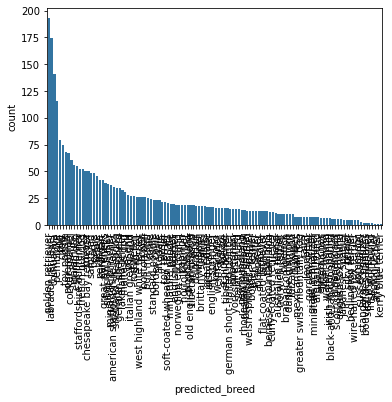

In [117]:
base_color = sns.color_palette()[0]
sns.countplot(data=df, x='predicted_breed', color=base_color, order=breed_order);

# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90);

PROPORTION OF MOST COMMON DOG BREED

In [166]:
#the moost predicted breed that is True
pred_breed = df.groupby(['predicted_breed']).count()
most_popular = pred_breed.sort_values(['tweet_id'], ascending=False)
most_popular

,tweet_id,timestamp,source,text,expanded_url,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favourite_count,jpg_url,img_num,pred_number,conf_interval,dog_prediction
predicted_breed,,,,,,,,,,,,,,,,
golden retriever,193,193,193,193,193,193,193,193,41,193,193,193,193,193,193,193
labrador retriever,174,174,174,174,174,174,174,174,28,171,171,174,174,174,174,174
chihuahua,141,141,141,141,141,141,141,141,13,139,139,141,141,141,141,141
pembroke,116,116,116,116,116,116,116,116,18,115,115,116,116,116,116,116
pug,79,79,79,79,79,79,79,79,14,79,79,79,79,79,79,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
irish wolfhound,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2
bouvier des flandres,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2
scotch terrier,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1


In [173]:
#breed with highest like
dog_breed_fav_count = df.groupby(['predicted_breed']).sum()
dog_breed_fav_count['most_like'] = dog_breed_fav_count['favourite_count']/pred_breed['tweet_id']
dog_breed_fav_count['most_like'].sort_values(ascending=False)

predicted_breed
whippet                    17173.388889
black-and-tan coonhound    14793.500000
weimaraner                 14603.062500
groenendael                13936.500000
irish terrier              12654.470588
                               ...     
scottish deerhound          2857.500000
rhodesian ridgeback         2661.857143
miniature schnauzer         2624.750000
silky terrier               2487.600000
sealyham terrier            1368.500000
Name: most_like, Length: 118, dtype: float64

In [180]:
df.name.value_counts()

None       814
Charlie     20
Cooper      19
Lucy        17
Tucker      16
          ... 
Albus        1
Josep        1
Ivar         1
Keurig       1
Jeffri       1
Name: name, Length: 826, dtype: int64

In [175]:
dog_breed_fav_count = df.groupby(['name']).count()
dog_breed_fav_count['most_like'] = dog_breed_fav_count['favourite_count']/pred_breed['tweet_id']
dog_breed_fav_count['most_like'].sort_values(ascending=False)

name
Abby           NaN
Ace            NaN
Acro           NaN
Adele          NaN
Aiden          NaN
                ..
quite          NaN
space          NaN
the            NaN
unacceptable   NaN
very           NaN
Name: most_like, Length: 826, dtype: float64

In [148]:
dog_breed_df.sort_values(['favourite_count'], ascending =False).head()

NameError: name 'dog_breed_df' is not defined

In [118]:
df.predicted_breed.isnull().sum()

0

In [120]:
df_dog_breeds= df['predicted_breed'].value_counts().sum()
df_dog_breeds

3001

In [123]:
max_breed_count = breed_count[0]
max_breed_count

193

In [125]:
max_prop = max_breed_count/df_dog_breeds
print(max_prop)

0.06431189603465512


In [142]:
# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a step size 2\%
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06])

In [143]:
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06']

In [147]:
#sns.countplot(data= df, y='predicted_breed', color=base_color, order=breed_order)
#plt.xticks(tick_props * df_dog_breeds, tick_names)
#plt.xlabel('proportion');

dog with highest retweet and favorite count

In [ ]:
df_name = df[df['name'] isnull()==False]

#average favorite count for name

dog_name = df_name.query()
pd.DataFrame

RESOURCES

An article by John Chen (Yueh-Han) (https://towardsdatascience.com/data-analysis-project-weratedogs-16aad3f6c8c2)

